In [1]:
import pandas as pd
import numpy as np
import re
from word2number import w2n
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#Abrir el pd limpio
df = pd.read_csv('2_HR_DATA_clean.csv', index_col = 0)

In [4]:
df.sample(20)

,age,attrition,business_travel,distance_from_home,education,education_field,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income_$,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,worklife_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,remote_work
362,31,no,travel_rarely,7,4,NaN,2,M,2,1,sales representative,3,NaN,2329.0,3,NaN,15,NaN,2,part-time,0,NaN,4.0,7,5,2,no
1009,56,no,non-travel,4,4,NaN,4,F,3,5,manager,1,divorced,NaN,4,No,13,3.0,4,full-time,1,28.0,3.0,5,4,2,yes
1406,42,no,non-travel,2,3,medical,3,M,2,1,laboratory technician,2,married,4841.0,4,NaN,14,NaN,2,full-time,1,NaN,NaN,1,0,0,yes
169,55,no,non-travel,26,4,human resources,3,M,4,5,manager,2,married,NaN,4,Yes,18,3.0,1,part-time,1,35.0,3.0,10,1,4,yes
1317,35,no,non-travel,20,3,NaN,20,M,2,1,laboratory technician,3,married,NaN,1,No,18,3.0,3,full-time,2,1.0,3.0,1,0,0,no
1095,36,no,non-travel,5,4,life sciences,2,F,3,3,healthcare representative,1,married,NaN,4,No,12,NaN,3,full-time,2,9.0,3.0,3,0,2,yes
732,26,no,non-travel,1,2,medical,1,M,2,1,laboratory technician,1,married,NaN,1,No,16,3.0,1,full-time,2,6.0,3.0,5,1,3,yes
686,53,no,non-travel,3,4,NaN,3,M,3,4,research director,3,married,17584.0,3,Yes,16,3.0,4,full-time,3,21.0,2.0,5,1,3,yes
1371,35,no,travel_rarely,1,4,medical,4,M,2,1,laboratory technician,3,NaN,2258.0,6,No,12,3.0,2,full-time,1,NaN,3.0,8,1,7,yes
1294,40,no,travel_rarely,2,3,NaN,2,F,2,2,laboratory technician,3,married,3448.0,6,No,22,4.0,2,full-time,1,NaN,3.0,1,0,0,yes


# TRATAMIENTO DE NULOS

In [5]:
print(df.isnull().sum())

age                             0
attrition                       0
business_travel                 0
distance_from_home              0
education                       0
education_field               745
environment_satisfaction        0
gender                          0
job_involvement                 0
job_level                       0
job_role                        0
job_satisfaction                0
marital_status                651
monthly_income_$              843
num_companies_worked            0
over_time                     676
percent_salary_hike             0
performance_rating            195
relationship_satisfaction       0
standard_hours                  0
stock_option_level              0
total_working_years           526
worklife_balance              108
years_at_company                0
years_since_last_promotion      0
years_with_curr_manager         0
remote_work                     0
dtype: int64


In [6]:
len(df.columns)

27

In [7]:
# 4. DataFrame con columnas que tienen nulos y su %:
porc_nulos = (df.isnull().sum() / df.shape[0]) * 100
df_nulos = pd.DataFrame(porc_nulos, columns=["%_nulos"])
print("\nColumnas con nulos y su porcentaje:")
display(df_nulos[df_nulos["%_nulos"] > 0])

# 5. Columnas categóricas con nulos
print("\nColumnas categóricas con nulos:")
nulos_esta_cat = df[df.columns[df.isnull().any()]].select_dtypes(include="O").columns
print(nulos_esta_cat)

# 6. Columnas numéricas con nulos
print("\nColumnas numéricas con nulos:")
nulos_esta_num = df[df.columns[df.isnull().any()]].select_dtypes(include=np.number).columns
print(nulos_esta_num)


Columnas con nulos y su porcentaje:


,%_nulos
education_field,46.158612
marital_status,40.334572
monthly_income_$,52.230483
over_time,41.883519
performance_rating,12.081784
total_working_years,32.589839
worklife_balance,6.691450



Columnas categóricas con nulos:
Index(['education_field', 'marital_status', 'over_time'], dtype='object')

Columnas numéricas con nulos:
Index(['monthly_income_$', 'performance_rating', 'total_working_years',
       'worklife_balance'],
      dtype='object')


# Categoricas

In [8]:
for col in nulos_esta_cat:
    print(f"La distribución de las categorías (incluyendo nulos) para la columna", col)
    display(df[col].value_counts(dropna=False, normalize=True) * 100)  # Convertimos a porcentaje
    print("........................")

La distribución de las categorías (incluyendo nulos) para la columna education_field


education_field
NaN                 46.158612
life sciences       21.623296
medical             17.100372
marketing            6.443618
technical degree     4.275093
other                3.655514
human resources      0.743494
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos) para la columna marital_status


marital_status
NaN         40.334572
married     27.199504
single      20.136307
divorced    12.329616
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos) para la columna over_time


over_time
No     42.255266
NaN    41.883519
Yes    15.861214
Name: proportion, dtype: float64

........................


In [ ]:
# cambiamos los nulos por "unknown"
columnas_desconocido = ["education_field", "marital_status", "over_time"]
for col in columnas_desconocido:
    df[col] = df[col].fillna('unknown')

In [ ]:
# comprobar nulos
columnas_object_con_nulos = df[df.columns[df.isnull().any()]].select_dtypes(include = "O").columns
columnas_object_con_nulos 

Index([], dtype='object')

# Numericas

In [13]:
columnas_number_con_nulos = df[df.columns[df.isnull().any()]].select_dtypes(include = "number").columns
columnas_number_con_nulos

Index(['monthly_income_$', 'performance_rating', 'total_working_years',
       'worklife_balance'],
      dtype='object')

In [15]:
df[columnas_number_con_nulos].isnull().sum() / df.shape[0]

monthly_income_$       0.522305
performance_rating     0.120818
total_working_years    0.325898
worklife_balance       0.066914
dtype: float64

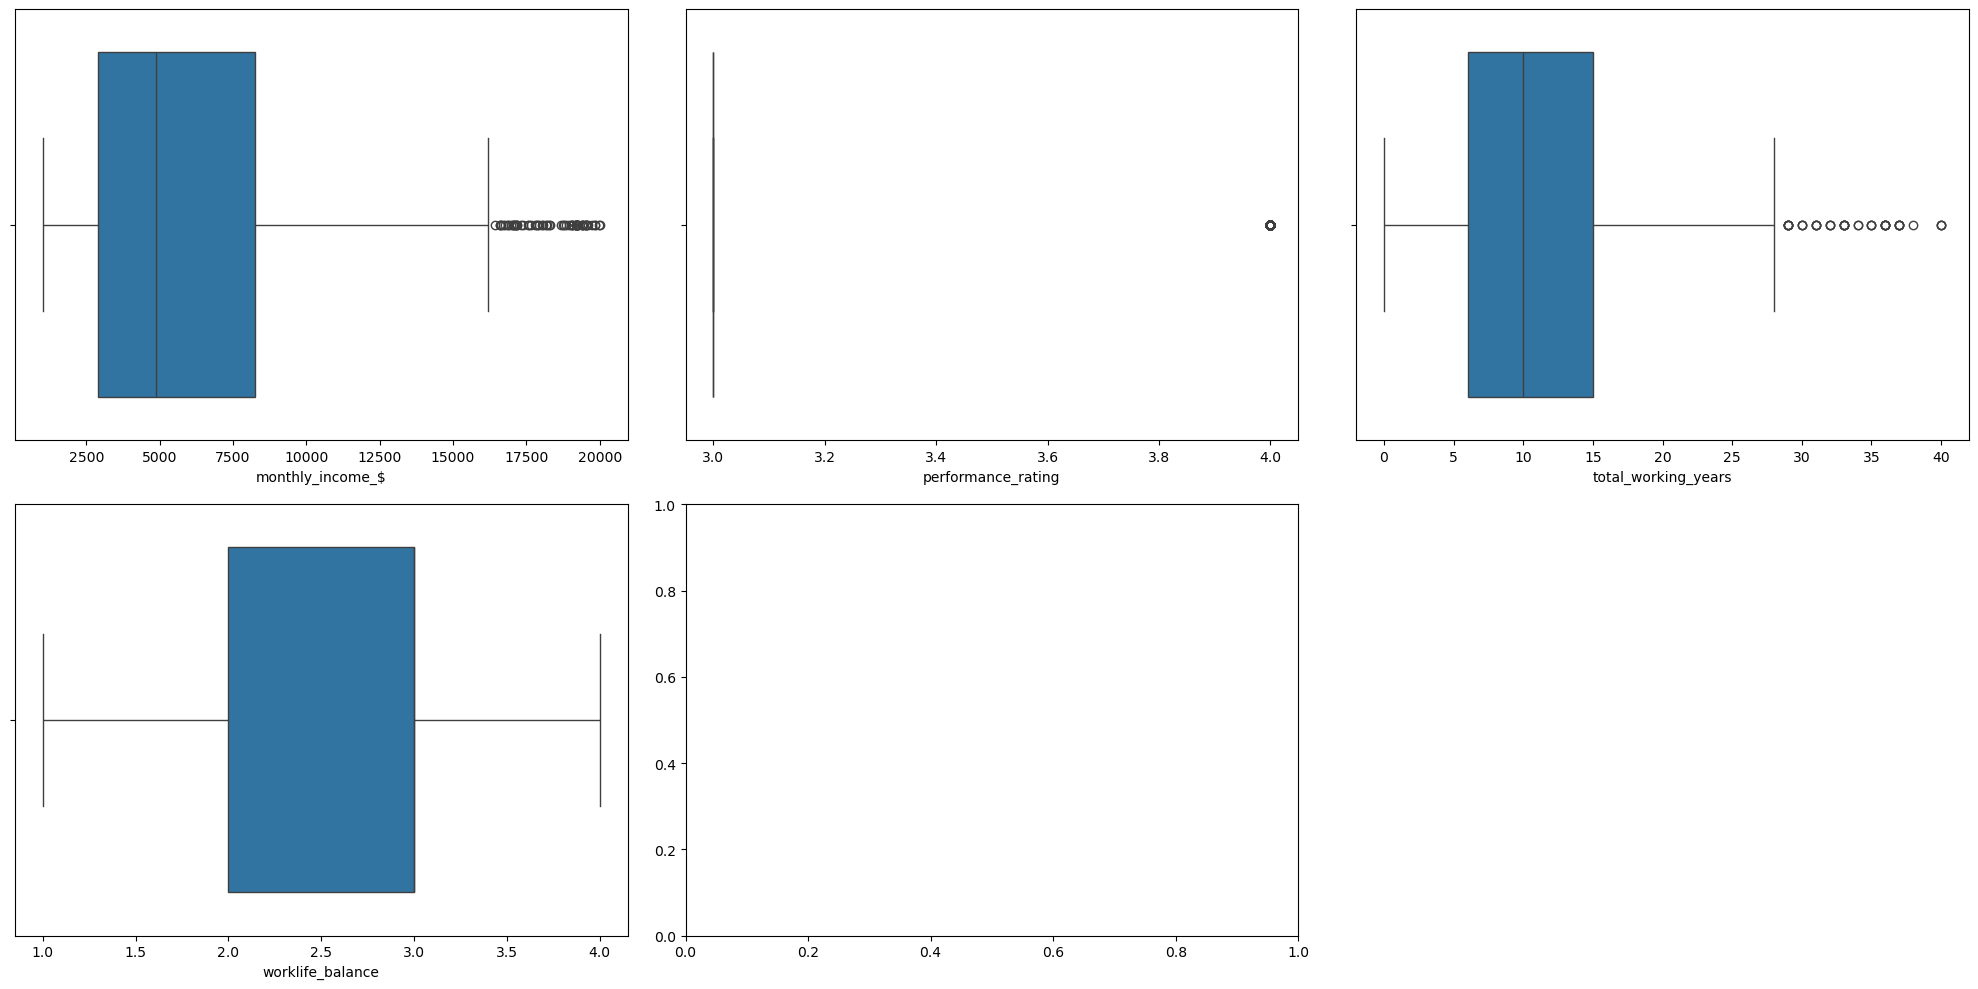

In [16]:
# lo siguiente que tendríamos que hacer es ver si dentro de las columnas donde tenemos nulos tenemos valores atípicos. 
# Para hacer esto lo mejor es usar visualización, sin embargo, todavía no hemos aprendido (lo haremos mañana). 
# Por lo tanto, el código que tenéis a continuación no es necesario que lo entendais. 
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10)) 
axes = axes.flat
for indice, col in enumerate(columnas_number_con_nulos):
    sns.boxplot(x = col, data = df, ax = axes[indice])
    
plt.tight_layout()
fig.delaxes(axes[-1]);

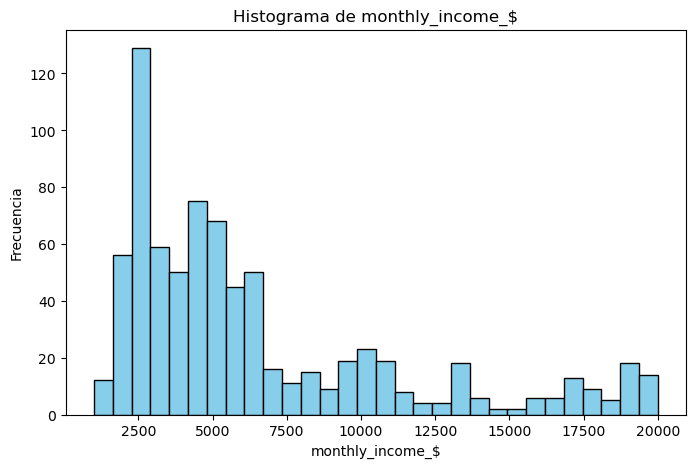

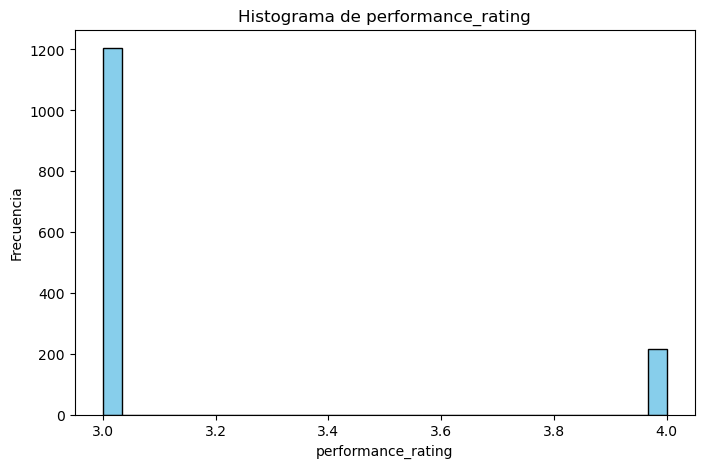

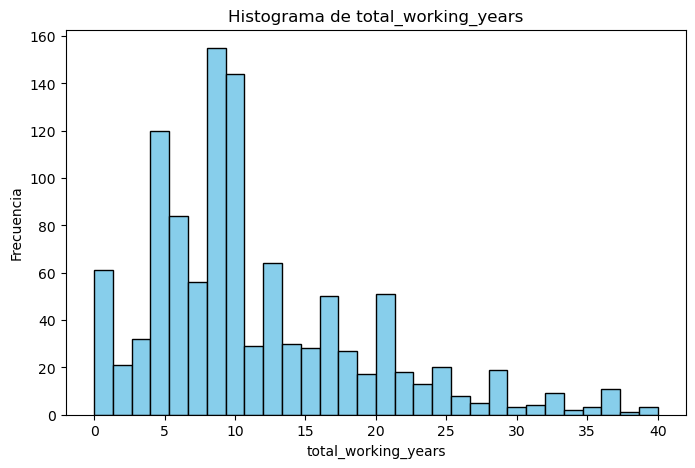

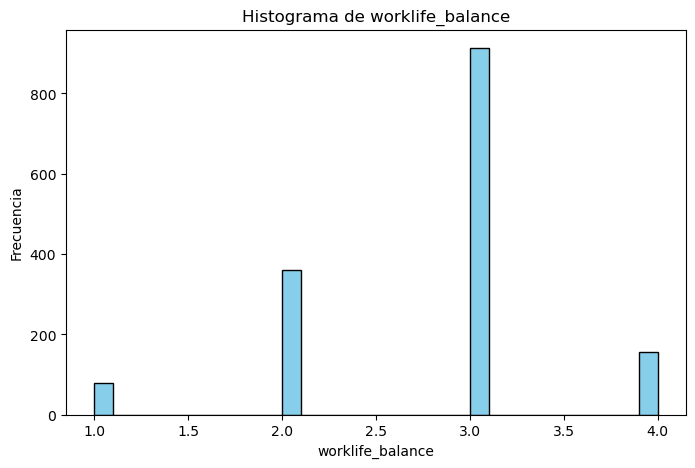

In [17]:
for col in list(columnas_number_con_nulos):
    plt.figure(figsize=(8, 5))
    plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

In [18]:
for col in nulos_esta_num:
    print(f"La distribución de las categorías (incluyendo nulos) para la columna", col)
    display(df[col].value_counts(dropna=False, normalize=True) * 100)  # Convertimos a porcentaje
    print("........................")

La distribución de las categorías (incluyendo nulos) para la columna monthly_income_$


monthly_income_$
NaN        52.230483
6347.0      0.247831
5304.0      0.247831
2657.0      0.185874
2258.0      0.185874
5405.0      0.123916
8224.0      0.123916
2610.0      0.123916
5731.0      0.123916
2539.0      0.123916
2376.0      0.123916
11713.0     0.123916
2216.0      0.123916
19189.0     0.123916
8793.0      0.123916
3452.0      0.123916
2070.0      0.123916
2587.0      0.123916
4960.0      0.123916
11159.0     0.123916
5396.0      0.123916
2782.0      0.123916
4197.0      0.123916
9434.0      0.123916
5337.0      0.123916
2741.0      0.123916
2791.0      0.123916
5828.0      0.123916
3420.0      0.123916
2033.0      0.123916
2821.0      0.123916
7756.0      0.123916
2042.0      0.123916
6632.0      0.123916
7587.0      0.123916
4335.0      0.123916
5980.0      0.123916
4244.0      0.123916
5228.0      0.123916
2700.0      0.123916
2909.0      0.123916
2404.0      0.123916
2377.0      0.123916
2366.0      0.123916
2329.0      0.123916
4294.0      0.123916
6725.0      0.123

........................
La distribución de las categorías (incluyendo nulos) para la columna performance_rating


performance_rating
3.0    74.659232
4.0    13.258984
NaN    12.081784
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos) para la columna total_working_years


total_working_years
NaN     32.589839
10.0     8.921933
8.0      5.328377
6.0      5.204461
9.0      4.275093
5.0      4.089219
7.0      3.469641
4.0      3.345725
1.0      3.283767
12.0     2.106568
3.0      1.982652
13.0     1.858736
14.0     1.858736
11.0     1.796778
16.0     1.734820
15.0     1.734820
20.0     1.734820
18.0     1.672862
21.0     1.425031
17.0     1.363073
2.0      1.301115
22.0     1.115242
19.0     1.053284
24.0     0.867410
23.0     0.805452
28.0     0.805452
0.0      0.495663
26.0     0.495663
36.0     0.371747
29.0     0.371747
25.0     0.371747
33.0     0.371747
37.0     0.309789
27.0     0.309789
31.0     0.247831
35.0     0.185874
32.0     0.185874
30.0     0.185874
40.0     0.185874
34.0     0.123916
38.0     0.061958
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos) para la columna worklife_balance


worklife_balance
3.0    56.567534
2.0    22.242875
4.0     9.603470
NaN     6.691450
1.0     4.894672
Name: proportion, dtype: float64

........................


In [19]:
#Primero imputamos por la mediana: worklife_balance
median_worklife_balance = df["worklife_balance"].median()
print(median_worklife_balance)

df["worklife_balance"] = df["worklife_balance"].fillna(median_worklife_balance)

3.0


In [ ]:
# otra forma de hacerlo con el SimpleImputer

#imputer = SimpleImputer(strategy='median')  # Aquí puedes elegir 'mean', 'median', 'mode", etc.
#df['worklife_balance'] = imputer.fit_transform(df[['worklife_balance']])

In [ ]:
#Borramos la columna "performance_rating" 

df.drop("performance_rating", axis=1, inplace=True)

In [24]:
columnas_number_con_nulos = df[df.columns[df.isnull().any()]].select_dtypes(include = "number").columns
columnas_number_con_nulos

Index(['monthly_income_$', 'total_working_years'], dtype='object')

In [25]:
# como vamos a crear columnas nuevas, vamos a hacer una copia del DataFrame usando el método 'copy()'
df_copia = df.copy()
df_copia.head(1)

,age,attrition,business_travel,distance_from_home,education,education_field,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income_$,num_companies_worked,over_time,percent_salary_hike,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,worklife_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,remote_work
0,51,no,non-travel,6,3,unknown,1,M,3,5,research director,3,unknown,19537.0,7,No,13,3,full-time,0,NaN,3.0,20,15,15,yes


In [26]:
# hemos dicho que para las dos columnas restantes aplicaremos los dos métodos para luego compararlos, empezaremos por el IterativeImputer
# instanciamos las clases
imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)
# ajustamos y tranformamos los datos
imputer_iterative_imputado = imputer_iterative.fit_transform(df_copia[["monthly_income_$", "total_working_years"]])
# comprobamos que es lo que nos devuelve, que en este caso es un array también
imputer_iterative_imputado

array([[1.95370000e+04, 3.25871610e+01],
       [1.99990000e+04, 3.40000000e+01],
       [1.92320000e+04, 2.20000000e+01],
       ...,
       [5.12921955e+03, 9.00000000e+00],
       [6.64128693e+03, 1.20000000e+01],
       [1.08450000e+04, 1.86484620e+01]])

In [27]:
# en este caso como vamos a aplicar los dos métodos sobre estas columnas vamos a crear dos columnas nuevas
df_copia[["monthly_income_$_iterative", "total_working_years_iterative"]] = imputer_iterative_imputado
# comprobamos los nulos
print(f"Después del 'Iterative' tenemos: \n{df_copia[["monthly_income_$_iterative", "total_working_years_iterative"]].isnull().sum()} nulos")

Después del 'Iterative' tenemos: 
monthly_income_$_iterative       0
total_working_years_iterative    0
dtype: int64 nulos


In [28]:
df_copia.head()

,age,attrition,business_travel,distance_from_home,education,education_field,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income_$,num_companies_worked,over_time,percent_salary_hike,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,worklife_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,remote_work,monthly_income_$_iterative,total_working_years_iterative
0,51,no,non-travel,6,3,unknown,1,M,3,5,research director,3,unknown,19537.0,7,No,13,3,full-time,0,NaN,3.0,20,15,15,yes,19537.000000,32.587161
1,52,no,non-travel,1,4,life sciences,3,M,2,5,manager,3,unknown,19999.0,0,unknown,14,1,full-time,1,34.0,3.0,33,11,9,yes,19999.000000,34.000000
2,42,no,travel_rarely,4,2,technical degree,3,M,3,5,manager,4,married,19232.0,1,No,11,4,full-time,0,22.0,3.0,22,11,15,yes,19232.000000,22.000000
3,47,no,travel_rarely,2,4,medical,1,F,3,4,research director,3,married,17169.0,3,unknown,19,2,full-time,2,NaN,3.0,20,5,6,no,17169.000000,28.789780
4,46,no,non-travel,3,3,technical degree,1,F,4,4,sales executive,1,divorced,NaN,2,No,12,4,full-time,1,NaN,3.0,19,2,8,no,6399.663531,11.520610


In [29]:
# hagamos ahora lo mismo con el KNNImputer. NOTA, la ejecución de esta celda puede tardar un ratito
# instanciamos la clase del KNNImputer
imputer_knn = KNNImputer(n_neighbors = 5)
# ajustamos y transformamos los datos
imputer_knn_imputado = imputer_knn.fit_transform(df_copia[["monthly_income_$", "total_working_years"]])
# comprobamos que es lo que nos devuelve, que sigue siendo un array
imputer_knn_imputado

array([[1.9537e+04, 3.0000e+01],
       [1.9999e+04, 3.4000e+01],
       [1.9232e+04, 2.2000e+01],
       ...,
       [7.0506e+03, 9.0000e+00],
       [5.2886e+03, 1.2000e+01],
       [1.0845e+04, 1.7000e+01]])

In [30]:
# por último nos queda añadir ese array al DataFrame como hemos hecho hasta ahora
df_copia[["monthly_income_$_knn", "total_working_years_knn"]] = imputer_knn_imputado

# comprobamos los nulos
print(f"Después del 'KNN' tenemos: \n{df_copia[["monthly_income_$_knn", "total_working_years_knn"]].isnull().sum()} nulos")

Después del 'KNN' tenemos: 
monthly_income_$_knn       0
total_working_years_knn    0
dtype: int64 nulos


In [31]:
df_copia.describe()[["monthly_income_$", "monthly_income_$_iterative", "monthly_income_$_knn","total_working_years", "total_working_years_iterative", "total_working_years_knn"]]

,monthly_income_$,monthly_income_$_iterative,monthly_income_$_knn,total_working_years,total_working_years_iterative,total_working_years_knn
count,771.000000,1614.000000,1614.000000,1088.000000,1614.000000,1614.000000
mean,6477.686122,6399.663531,6455.726816,11.318934,11.520610,11.508224
std,4766.119959,3991.855967,4057.303192,7.727675,7.119934,6.957940
min,1009.000000,593.017428,1009.000000,0.000000,0.000000,0.000000
25%,2880.000000,3617.152177,3641.600000,6.000000,7.000000,7.000000
50%,4859.000000,5633.242011,5986.500000,10.000000,10.000000,10.600000
75%,8230.500000,6908.750000,7284.600000,15.000000,13.000000,13.000000
max,19999.000000,20753.915760,19999.000000,40.000000,40.000000,40.000000


In [32]:
# ante esta situación, vamos a eliminar las columnas que ya no nos interesan para guardar el DataFrame para la lección de mañana. 
# en nuestro caso eliminaremos, "age", "padays", "euribor3m" (porque tienen nulos), "age_knn" y "euribor_knn" (porque para estas columnas podríamos haber eliminado cualquiera de las columnas derivadas de la imputación) y "pdays_iterative" (porque hemos visto que es la que peor imputaba los nulos)
df_copia.drop(["monthly_income_$", "monthly_income_$_knn","total_working_years", "total_working_years_knn"], axis = 1, inplace = True)
# ahora vamos a cambiar el nombre de las columnas que quedaron para que tengan el mismo nombre de origen
nuevo_nombre = {"monthly_income_$_iterative": "monthly_income_$",  'total_working_years_iterative': "total_working_years" }
df_copia.rename(columns = nuevo_nombre, inplace = True)

In [35]:
df_copia.head()

,age,attrition,business_travel,distance_from_home,education,education_field,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,num_companies_worked,over_time,percent_salary_hike,relationship_satisfaction,standard_hours,stock_option_level,worklife_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,remote_work,monthly_income_$,total_working_years
0,51,no,non-travel,6,3,unknown,1,M,3,5,research director,3,unknown,7,No,13,3,full-time,0,3.0,20,15,15,yes,19537.000000,32.587161
1,52,no,non-travel,1,4,life sciences,3,M,2,5,manager,3,unknown,0,unknown,14,1,full-time,1,3.0,33,11,9,yes,19999.000000,34.000000
2,42,no,travel_rarely,4,2,technical degree,3,M,3,5,manager,4,married,1,No,11,4,full-time,0,3.0,22,11,15,yes,19232.000000,22.000000
3,47,no,travel_rarely,2,4,medical,1,F,3,4,research director,3,married,3,unknown,19,2,full-time,2,3.0,20,5,6,no,17169.000000,28.789780
4,46,no,non-travel,3,3,technical degree,1,F,4,4,sales executive,1,divorced,2,No,12,4,full-time,1,3.0,19,2,8,no,6399.663531,11.520610


In [36]:
# Guardamos el DataFrame para usarlo en la lección de mañana 
df_copia.to_csv("3_HR_DATA_nulos.csv",index=False)

In [3]:
df = pd.read_csv("3_HR_DATA_nulos.csv")

# Tipo de dato

In [ ]:
#Comprobamos el tipo de dato de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         1614 non-null   int64  
 1   attrition                   1614 non-null   object 
 2   business_travel             1614 non-null   object 
 3   distance_from_home          1614 non-null   int64  
 4   education                   1614 non-null   int64  
 5   education_field             1614 non-null   object 
 6   environment_satisfaction    1614 non-null   int64  
 7   gender                      1614 non-null   object 
 8   job_involvement             1614 non-null   int64  
 9   job_level                   1614 non-null   int64  
 10  job_role                    1614 non-null   object 
 11  job_satisfaction            1614 non-null   int64  
 12  marital_status              1614 non-null   object 
 13  num_companies_worked        1614 

In [ ]:
#CCorregimos el tipo de dato de las columnas que lo necesitan
df[["worklife_balance","monthly_income_$", "total_working_years"]] = df[["worklife_balance","monthly_income_$", "total_working_years"]].astype(int)

In [ ]:
#Comprobamos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         1614 non-null   int64 
 1   attrition                   1614 non-null   object
 2   business_travel             1614 non-null   object
 3   distance_from_home          1614 non-null   int64 
 4   education                   1614 non-null   int64 
 5   education_field             1614 non-null   object
 6   environment_satisfaction    1614 non-null   int64 
 7   gender                      1614 non-null   object
 8   job_involvement             1614 non-null   int64 
 9   job_level                   1614 non-null   int64 
 10  job_role                    1614 non-null   object
 11  job_satisfaction            1614 non-null   int64 
 12  marital_status              1614 non-null   object
 13  num_companies_worked        1614 non-null   int6

In [ ]:
# Guardamos el DataFrame para usarlo en la lección de mañana sobreescribiendo el anterior
df.to_csv("3_HR_DATA_nulos.csv",index=False)